<a href="https://colab.research.google.com/github/EricAshby/EDA-Melbourne-Housing/blob/main/TEDA1040_Mod1_project_EricAshby_09_15_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on Melbourne Housing
Eric D. Ashby



##Introduction





The city of Melbourne, Australia has been experiencing a housing boom. The data set explored in this analysis consists of housing data in the city.

This analysis will explore the data through visualizations and other data analysis techniques in order to fulfil a number of visualization requests and to answer the associated questions outlined below.

##Purpose of Analysis


This analysis aims to create the following visualizations and answer the associated questions:
1.  Create a scatter plot that shows land size on the x-axis and price on the y-axis. Change the color of the points to reflect the type of the property.
  *  Which type of property experiences a steep price increase as the land size goes up?
2.  Create a line chart that shows the year built along the x-axis and the average price per year on the y-axis.
  *  According to the line chart produced above, does the average price of properties seem to increase or decrease as the property becomes newer?
3.  Create a bar chart that shows the region on the x-axis and the average price of the property on the y-axis.
  *  According to the bar chart above, properties appear to have the highest average price in which region?
4.  Create a histogram of property prices.
  *  According to the histogram above, are the prices for properties right skewed, left skewed, or not skewed at all?
5.  Create a box plot that shows the years that each property was built on the x-axis and the region on the y-axis. These box plots should be oriented horizontally.
  *  According to the box plot above, which region has properties built in the widest range of time?
  *  According to the box plot above, which region is the only region that has very few properties listed that were built after the year 2000?

##Overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('melbourne_housing.csv')

###About the Data

Shown by the code below are the first 5 rows in the `melbourne_housing.csv` data set.  We see that the data is primarily comprised of information on housing location (address, suburb, region, etc.) and property amenities/features (bedrooms, bathrooms, land size, etc.). Also contained in the data set is selling information, such as seller and price.

There are a total of 19 columns of data for each entry. Only some of this data will be relevant to this analysis.

One pattern that we can note by investigating these five rows, the Rooms column does not seem to be the total number of rooms as it does not agree with the number of bedrooms and bathrooms in the same record. It seems, then, that these rooms are rooms other than those that are also listed in the data set, such as kitchens and living rooms.

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019


Here, this code displays the metadata for the data set.  We see that there are 13580 records in the data set with 19 columns each. Some of these columns are noticeably lacking in entires, however. Car, BuildingArea, YearBuilt, and CouncilArea have missing data.  The amounts of missing data in BuildingArea and YearBuilt in particular are especially egregious.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Regionname     13580 non-null  object 
 18  Proper

This code displays the descriptive statistics for the numerical data in the data set. Some peculiarites that might be worth noting are the unusual extrema in the Rooms column. Ten rooms is significantly higher than the 75th percentile and one room seems particularly low. The extrema in other columns, too, are concerning. Zero baths and zero bedrooms seems strange for housing and 20 bedrooms is certainly not typical.  The build year of 1196 is quite a while ago and doesn't fit with the rest of the data. The units for Landsize are not provided, but when considering the mean (558.4), the maximum of 433,014 seems unreasonbly high.  The same reasoning applies to BuildingArea. There are also zeros in these columns minima—not likely.

All in all, there seem to be a number of ouliers or, perhaps, business logic errors in need of addressing.

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000


###Duplicate Check

With a data set this size, it is always worth checking for any obvious duplicates.  The code below counts the number of exact duplicates in the data set. There are none—a good sign.

In [ ]:
df.duplicated().sum()

0

Just in case, it may be a good decision to also check for imperfect duplicates by considering just the address and post code, which *should* be unique for each record.  This code does just that:

In [ ]:
df[df.duplicated(subset = ['Address', 'Postcode'], keep = False)].sort_values(by = 'Address')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
9281,Preston,1 Bellarine St,5,h,1400000,PI,hockingstuart,3/6/2017,8.4,3072,5,2,2.0,558,217.0,1925.0,Darebin,Northern Metropolitan,14577
4958,Preston,1 Bellarine St,4,h,1400000,VB,Jellis,18/03/2017,8.8,3072,4,2,2.0,559,217.0,1925.0,Darebin,Northern Metropolitan,14577
7802,Essendon,1 Daisy St,4,h,1400000,VB,Nelson,8/4/2017,8.0,3040,4,2,1.0,267,NaN,NaN,Moonee Valley,Western Metropolitan,9264
9144,Essendon,1 Daisy St,4,h,1360000,S,Jellis,3/6/2017,7.5,3040,4,2,1.0,267,NaN,NaN,Moonee Valley,Western Metropolitan,9264
8055,Maidstone,1/1 Clarendon St,3,t,675000,S,Biggin,22/04/2017,9.2,3012,3,2,2.0,159,128.0,2016.0,Maribyrnong,Western Metropolitan,3873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,Reservoir,9/99 Barton St,2,u,335000,SP,Love,13/08/2016,11.2,3073,2,1,1.0,0,54.0,2012.0,Darebin,Northern Metropolitan,21650
11069,Heidelberg Heights,97 Edwin St,4,h,1645000,PI,Fletchers,12/8/2017,8.8,3081,4,2,4.0,596,120.0,1930.0,Banyule,Eastern Metropolitan,2947
3227,Heidelberg Heights,97 Edwin St,2,h,815000,SP,Fletchers,3/9/2016,10.5,3081,2,1,2.0,589,120.0,1930.0,Banyule,Eastern Metropolitan,2947
6842,Carlton,99 Neill St,3,h,1550000,VB,Nelson,22/08/2016,1.8,3053,2,3,1.0,0,192.0,NaN,Melbourne,Northern Metropolitan,6786


Using this criteria, we can see we have quite a number of seemingly duplicated records.  However, upon closer inspection, we see that, among other factors, the date (presumably when it was put on the market) differs between duplicates. It is feasible that a property may be put on the market again after making some changes. So, in a final check for our overview, we will consider the date as well in our search.

The code below searches again but also considers dates when looking for duplicates.

In [ ]:
df[df.duplicated(subset = ['Address', 'Postcode', 'Date'], keep = False)].sort_values(by = 'Address')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
7769,Coburg,69 Victoria St,3,t,720000,PI,C21,29/04/2017,7.8,3058,3,2,2.0,531,112.0,2016.0,Moreland,Northern Metropolitan,11204
7770,Coburg,69 Victoria St,3,t,720000,PI,Century,29/04/2017,7.8,3058,3,2,2.0,531,112.0,2016.0,Moreland,Northern Metropolitan,11204


With our search narrowed, we find one set of near-perfect duplicates. The difference between the two reveals a standardization error. "C21" and "Century" are likely the same company, as a quick Google search* reveals, namely Century 21 Real Estate.

    * https://www.google.com/search?q=century+real+estate+australia&sca_esv=565767936&rlz=1C1UEAD_enUS1027US1027&sxsrf=AM9HkKn5OQDvVWDMadBpATvUWU4j4vlQ_A%3A1694813666977&ei=4s0EZZKjO8S-kPIPxNyr8A0&ved=0ahUKEwiSnNL0yK2BAxVEH0QIHUTuCt4Q4dUDCBE&uact=5&oq=century+real+estate+australia&gs_lp=Egxnd3Mtd2l6LXNlcnAiHWNlbnR1cnkgcmVhbCBlc3RhdGUgYXVzdHJhbGlhMgYQABgHGB4yBhAAGAUYHjIGEAAYCBgeMggQABiKBRiGAzIIEAAYigUYhgMyCBAAGIoFGIYDMggQABiKBRiGA0jxGFAAWL0JcAB4AZABAJgBaKAB6gSqAQM1LjK4AQPIAQD4AQHCAggQABgIGAcYHsICCBAAGAUYBxge4gMEGAAgQYgGAQ&sclient=gws-wiz-serp

It seems prudent, therefore, to fix this in the data set before dropping the soon-to-be-perfect duplicate and proceding with the analysis.

In [ ]:
#dictate replacements to be made
replacements = {
    'Century' : 'Century21',
    'C21' : 'Century21'
}

#make replacements
df['SellerG'].replace(replacements, inplace = True)

#drop (now) perfect duplicates
df.drop_duplicates(inplace = True)


###About Missing Data

As we have seen, the data set contains null values, or missing data, in a number of columns. If the purpose of this analysis were to provide a data set  to a machine learning algorithm or to conduct an exhaustive numerical analysis of the data, the entries with uncorrectable data would have to be dealt with in some way. However, since this analysis is graphical in nature, we do not nead to worry about that.  This is due to the fact that the current versions of the python libraries `matplotlib` and `seaborn` are designed to ignore null values while ploting data by default.

##Analysis

###Create a scatter plot that shows land size on the x-axis and price on the y-axis. Change the color of the points to reflect the type of the property.

Before we do any plotting, here is a shortcut labeling function to speed up the plotting process.

In [ ]:
def labeler(title, xlabel, ylabel, boldBool = True) :
  if boldBool:
    plt.title(title, fontweight = 'bold')
    plt.xlabel(xlabel, fontweight = 'bold')
    plt.ylabel(ylabel, fontweight = 'bold')
  else:
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

The code below creates a scatter plot of Landsize vs Price. We see that the suspected outlier in Landsize that we spotted before seems to be making the plot near-illegible.

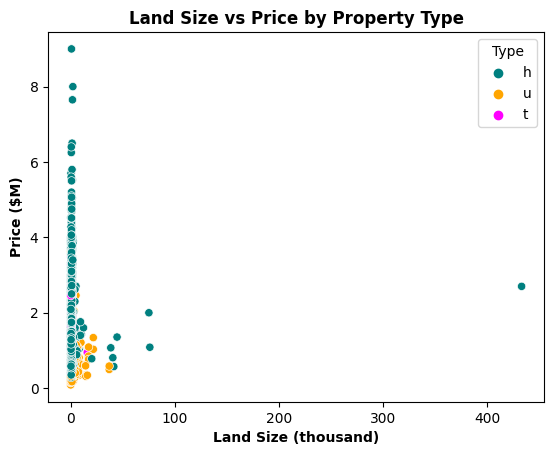

In [ ]:
#create a columns for scaled price and scaled land size
million = 1000000
thousand = 1000
df['ScaledPrice'] = df['Price'] / million
df['ScaledLandsize'] = df['Landsize'] / thousand

#create and display scatterplot
plt.figure(dpi = 100)
sns.scatterplot(data = df, x = 'ScaledLandsize', y = 'ScaledPrice', hue = 'Type', palette = ['teal', 'orange', 'magenta']) #scale price and land size
labeler('Land Size vs Price by Property Type', 'Land Size (thousand)', 'Price ($M)') #scale price and land size
plt.show()

For a plot that is both more legible as well as more representative of the data set as a whole, we can remove outliers from the data set.  To do this, we will use the z-score with z = 3 as our boundary of acceptibility. Below, we have code that creates a new column for land size z-scores and then creates a subset of the data with outliers removed.

In [ ]:
#calculate mean and stdev
land_mu = df['Landsize'].mean()
land_sigma = df['Landsize'].std()

#create z-score column
df['LandZScore'] = (df['Landsize'] - land_mu) / land_sigma

#define boundary of acceptability (z=3)
bound = 3

#create filter for land size out boundary of acceptability
isOutlier = df['LandZScore'].apply('abs') > bound

#create subset with outliers removed
noLandOut_df = df.drop(index = df[isOutlier].index)

Another shot at our scatter plot (this time with trendlines) yields the result below.

<Figure size 1280x960 with 0 Axes>

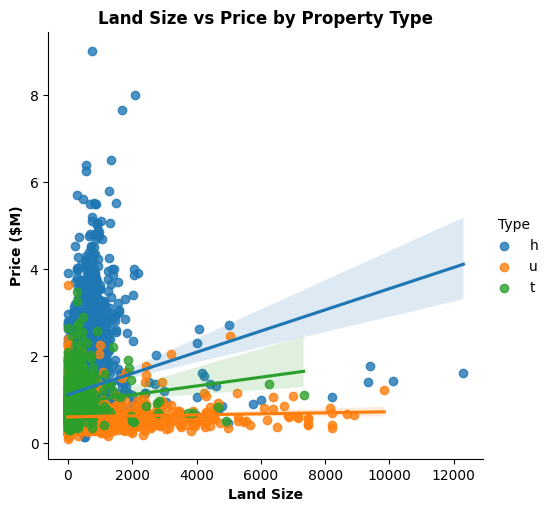

In [ ]:
#create and display scatterplot
plt.figure(dpi = 200)
sns.lmplot(data = noLandOut_df, x = 'Landsize', y = 'ScaledPrice', hue = 'Type') #scale price
labeler('Land Size vs Price by Property Type', 'Land Size', 'Price ($M)') #scale price
plt.show()

####Which type of property experiences a steep price increase as the land size goes up?

The last plot generated above finally gives us a clerar answer to this question. **House (h) prices exhibit a steep upward trend with increasing land size**.

###Create a line chart that shows the year built along the x-axis and the average price per year on the y-axis.

Before diving into this visualization, it is worth noting that one variable involved in this line chart (namely YearBuilt) is missing some data. Since this data cannot be imputed, we would ordinarily drop the offending entries from the data set for this visualization.  However, as discussed at the end of the Overview, the code we use to visualize the data ignores null values by default. We can, therefore, safely pass in a data set, holes or no, without issue.

Assuming "average price per year" means the average price *for each* year, the following code creates a line plot showing how the average price of a home changes with the year it was built.  Again, we are hindered by the presence of what we may assume to be an outlier.

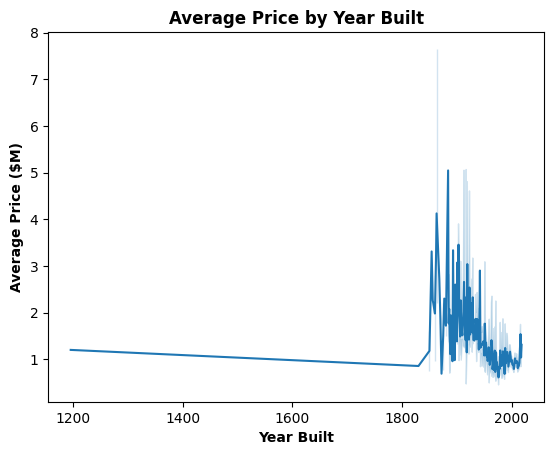

In [ ]:
#create and display line plot of build year vs average price for each year
sns.lineplot(data = df, x = 'YearBuilt', y = 'ScaledPrice', estimator = 'mean') #use scaled price created in previous section
labeler('Average Price by Year Built', 'Year Built', 'Average Price ($M)') #scale price
plt.show()


Upon reflection, we can easily conclude the property in 1196 to be erroneous since the Australian continent was not colonized until the late 1700s.  The code below gives a peak at this record.

In [ ]:
df[df['YearBuilt'] == df['YearBuilt'].min()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,ScaledPrice,ScaledLandsize,LandZScore
9968,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2017,14.2,3149,...,4.0,807,117.0,1196.0,Monash,Eastern Metropolitan,13366,1.2,0.807,0.062288


Since the business logic error cannot be imupted from existing data, we may as well treat it as an outlier in that will remove it.  Let us remove any outliers (and the erroneous record) from this plot using the same methods as the previous section.

In [ ]:
#calculate mean and stdev
build_mu = df['YearBuilt'].mean()
build_sigma = df['YearBuilt'].std()

#create z-score column
df['BuildZScore'] = (df['YearBuilt'] - build_mu) / build_sigma

#define boundary of acceptability (z=3)
bound = 3

#create filter for build year out boundary of acceptability
isOutlier = df['BuildZScore'].apply('abs') > bound

#create subset with outliers removed
noBuildOut_df = df.drop(index = df[isOutlier].index)

Retrying our line plot, again, we get:

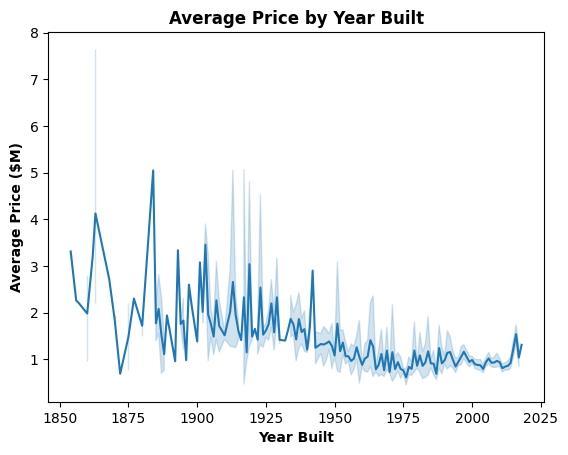

In [ ]:
#create and display line plot of build year vs average price for each year
sns.lineplot(data = noBuildOut_df, x = 'YearBuilt', y = 'ScaledPrice', estimator = 'mean')
labeler('Average Price by Year Built', 'Year Built', 'Average Price ($M)')
plt.show()

If the above graphic does not suit the client's tastes, another can be created using `matplotlib`, though an extra line of code is necessary:

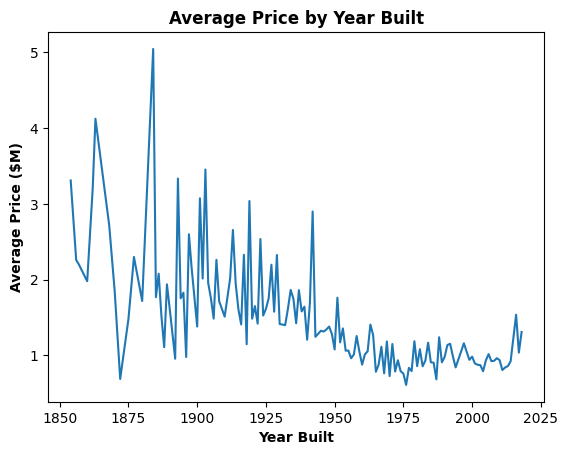

In [ ]:
#create subset of data grouped by build year and aggregated on the average price (using the scaled price created in the previous section)
YBgroup_Pagg_df = noBuildOut_df[['YearBuilt', 'ScaledPrice']].groupby('YearBuilt', as_index = False).mean().sort_values(by = 'YearBuilt')

plt.plot(YBgroup_Pagg_df['YearBuilt'], YBgroup_Pagg_df['ScaledPrice'])
labeler('Average Price by Year Built', 'Year Built', 'Average Price ($M)')
plt.show()

####According to the line chart produced above, does the average price of properties seem to increase or decrease as the property becomes newer?

After removing the outliers, we can see a clear trend of decreasing variability in average price as well as a **slight decrease in average price for newer properties**, though the newest properties seem to be starting to buck that trend.

###Create a bar chart that shows the region on the x-axis and the average price of the property on the y-axis.

For this bar chart, the long names of the regions are likely to conflict with the formatting of the plot. To fix this, we will create a new column of the data with shortened region names with the following code.

In [ ]:
#creates new column with region name shortened by reducing 'Northern' to 'N' etc.
df['RegionShortName'] = df['Regionname'].str.replace('Southern', 'S').str.replace('Northern', 'N').str.replace('Eastern', 'E').str.replace('Western', 'W').str.replace('South-', 'S-')

The code below creates a bar chart showing the average property price in each region.

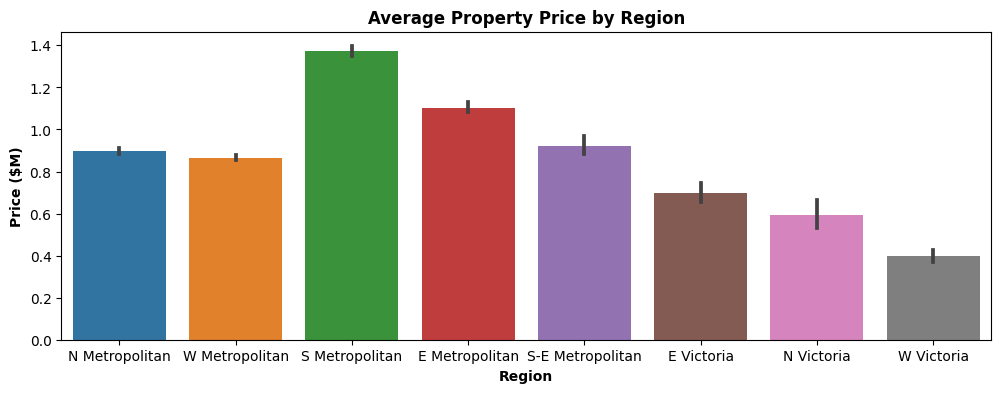

In [ ]:
#create, format, and display bar chart for the average price for each region
plt.figure(figsize=(12, 4))
sns.barplot(data = df, x = 'RegionShortName', y = 'ScaledPrice', estimator = 'mean') #use scaled price
labeler('Average Property Price by Region', 'Region', 'Price ($M)') #scale price in millions
plt.show()

Again, if this plot does not match the client's taste, another version can be created using the code below, though it also requires an extra line of code to aggregate.

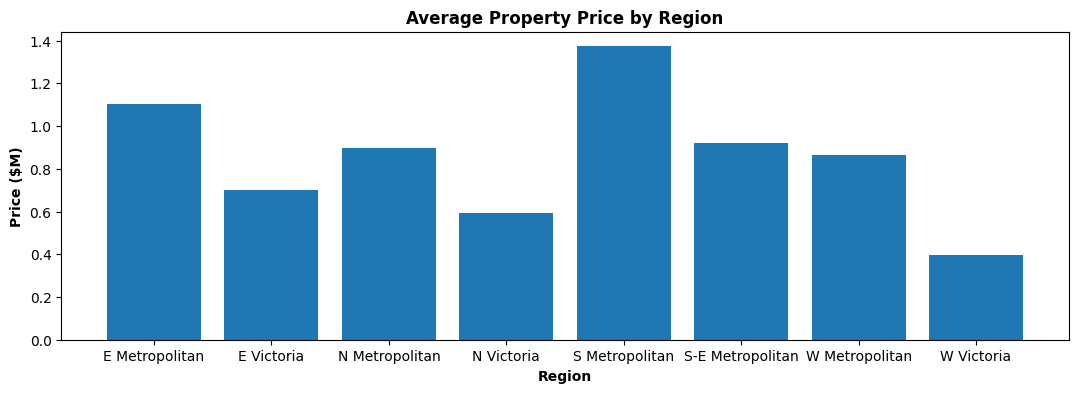

In [ ]:
#create subset of data grouped by region and aggregated on the average price (using the scaled price created in the first section)
Rgroup_Pagg_df = df[['RegionShortName', 'ScaledPrice']].groupby('RegionShortName', as_index = False).mean()

#create, format, and display bar chart for the average price for each region
plt.figure(figsize=(13, 4))
plt.bar(Rgroup_Pagg_df['RegionShortName'], Rgroup_Pagg_df['ScaledPrice'])
labeler('Average Property Price by Region', 'Region', 'Price ($M)') #scale price in millions
plt.show()

####According to the bar chart above, properties appear to have the highest average price in which region?

As we can see in the bar charts above, the **Southern Metropolitan region have the highest property prices on average**.

###Create a histogram of property prices

This code shows us a histogram of the property prices in Melbourne with a bin width of $50,000 Australian.

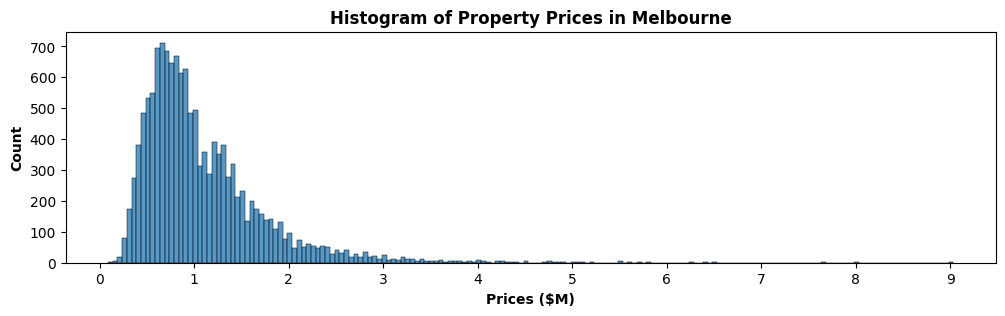

In [ ]:
#create a list of x-axis demarcations for use in plt.xticks()
tickMax = 9 #change this number to change the range of tick marks
demarcations = []
for x in range(tickMax+ 1):
  demarcations.append(x)

#create, format, and display histogram of property prices
plt.figure(figsize = (12,3))
sns.histplot(data = df, x = 'ScaledPrice', binwidth = .05) #scaled down by 1 million
labeler('Histogram of Property Prices in Melbourne', 'Prices ($M)', 'Count')
plt.xticks(ticks = demarcations)
plt.show()

####According to the histogram above, are the prices for properties right skewed, left skewed, or not skewed at all?

In the above histogram, we have a clear tail out to the right. That is, **the property prices are right-skewed**.

###Create a box plot that shows the years that each property was built on the x-axis and the region on the y-axis. These box plots should be oriented horizontally.

As we have discussed before, the YearBuilt column of the data set contains a number of null values, but , as we determined, we have no need to drop them as the plotting functions we are using are conveniently built to ignore them.

The box plot generated by the code below, uses the subset of data we created in a previous section that does not contain the year built outliers.

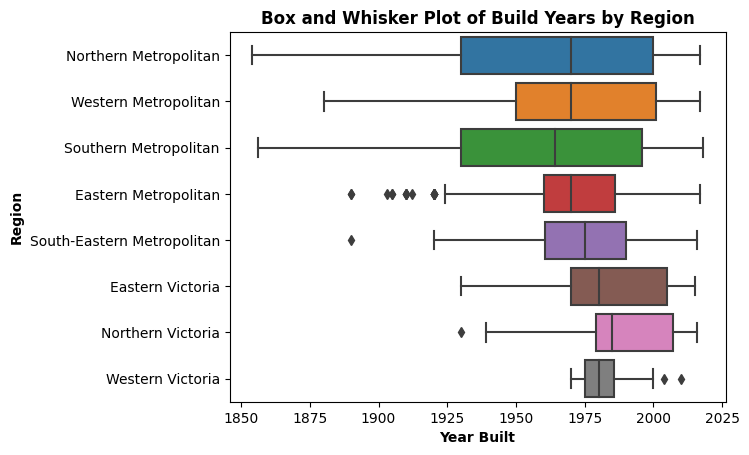

In [ ]:
#
sns.boxplot(data = noBuildOut_df, x = 'YearBuilt', y = 'Regionname')
labeler('Box and Whisker Plot of Build Years by Region','Year Built','Region')
plt.show()

For curiosity's sake, below, we have code that generates the same box and whisker plot for the data before outliers (and the erroneous record) were removed. Just as with other plots, the oulier renders the plot nearly indecipherable.

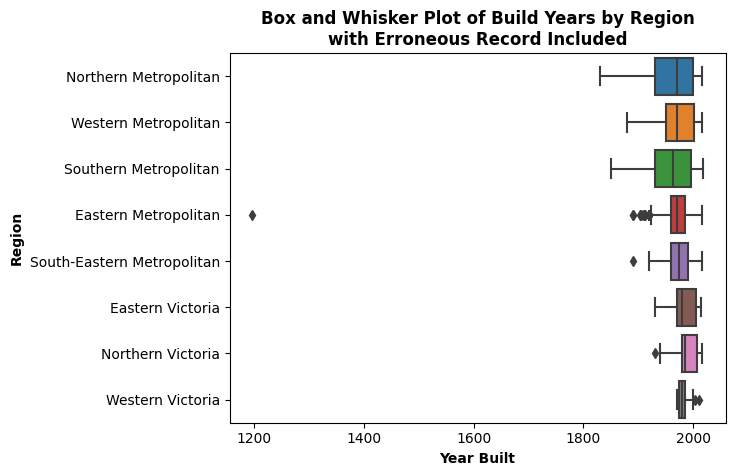

In [ ]:
#create, format, and display box and whisker for build years by region
sns.boxplot(data = df, x = 'YearBuilt', y = 'Regionname')
labeler('Box and Whisker Plot of Build Years by Region\nwith Erroneous Record Included','Year Built','Region')
plt.show()

####According to the box plot above, which region has properties built in the widest range of time?

Using the first of the two plots generated above, we can see that, by a hair, **the Northern Metropolitan region has properties built in the widest range of time**.  The code below confirms this.

In [ ]:
#create subset containing only region name and build year
check_df = noBuildOut_df[['YearBuilt', 'Regionname']]

#calculate build year extrema for both Northern and Southern Metropolitan regions
North_min = check_df[check_df['Regionname'] == 'Northern Metropolitan']['YearBuilt'].min()
North_max = check_df[check_df['Regionname'] == 'Northern Metropolitan']['YearBuilt'].max()
South_min = check_df[check_df['Regionname'] == 'Southern Metropolitan']['YearBuilt'].min()
South_max = check_df[check_df['Regionname'] == 'Southern Metropolitan']['YearBuilt'].max()

#calculate and display ranges
print('Northern Metropolitan Range:', North_max - North_min)
print('Southern Metropolitan Range:', South_max - South_min)

Northern Metropolitan Range: 163.0
Southern Metropolitan Range: 162.0


Note that the second of the two plots generated above, gives a completely different answer of the Eastern Metropolitan area due entirely to the one erroneous property in 1196.

####According to the box plot above, which region is the only region that has very few properties listed that were built after the year 2000?

Again, using the first of the two plots, we can clearly see that **the Western Victoria region has very few properties listed built after 2000**.

##Results



To conclude, all requested visualizations have been generated, with some improved or alternate versions also provided. These can be found in the body of the analysis. In our analysis, we found that the *Western Victoria* region has very few properties listed built after 2000, the *Northern Metropolitan* region has properties built in the widest range of time, property prices are *right-skewed*,  the *Southern Metropolitan* region have the highest property prices on average, the average price of properties *slightly decreases* for newer properties, and that *house* prices exhibit a steep upward trend with increasing land size.